# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 9 Minimax and Alpha-Beta Pruning ##

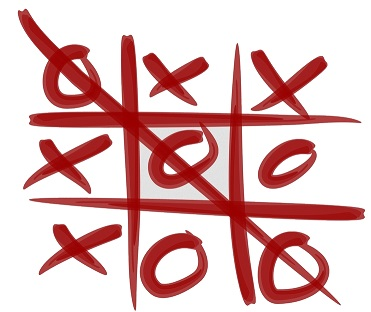

## **Tic-Tac-Toe Variants**
The classic tic-tac-toe can be extended to more complex versions. In this lab, we will implement a generalized tic-tac-toe that can have board size $S$ and connect $N$. Board size is $S$ means the board is an $S \times S$ square; Connect is $N$ means the players need to have $N$ connected moves to win. In classic tic-tac-toe, $S=3$ and $N=3$. Due to the heavy computation of the large board size, our maximum $S$ will be 5. Concretely, in addition to the classic one, you need to implement the following variants:
* $S=4$, $N=3$ 
* $S=5$, $N=3$ 
* $S=4$, $N=4$ 
* $S=5$, $N=5$ 

## **Lab Tasks**
1. Implement Minimax for generalized tic-tac-toe.
2. Implement Minimax with alpha-beta pruning for generalized tic-tac-toe.
3. Implement Minimax with alpha-beta pruning and depth for generalized tic-tac-toe.



## **ZINC Submission**
-  Copy the implemented ``check_game`` function to the given ``lab9_tasks.py`` file.
-  Copy the ``minimax`` function to the given ``lab9_tasks.py`` file.
-  Copy the ``minimax_abp`` function to the given ``lab9_tasks.py`` file.
-  Copy the ``minimax_abpd`` function to the given ``lab9_tasks.py`` file.

Zip ``lab9_tasks.py`` to a file named ``lab9_tasks.zip`` and submit the ``.zip`` file to ZINC.

## **ZINC Evaluation**
The function ``ai_turn`` will be called with the following arguments as input: 
* ``board_size``: the size of the board $S$ for the current game
* ``connect``: the connect $N$ of the current game
* ``board``: current state of the game
* ``strategy``: its value will be one of the three strings: *minimax*, *minimax_abp*, and *minimax_abpd*.

The function ``ai_turn`` should return the position of the next optimal move. We will test a number of cases.

## **Suggestions on the Implementation**
The interactive UI has been given for easy trial and testing. Thus, you may first implement all the codes, and use the interactive program to check the correctness using $S=3, N=3$ and $S=4, N=3$. For other variants, they will be quite slow for the first few steps (due to large search space), so they are not suitable for using the UI. However, as long as your code works well for $S=4, N=3$, it shall also work for others. 

In [ ]:
# Draw current state of the game
def drawboard(board_size, board):
    print('Current state: \n\n')
    for i in range(board_size**2):
        if board[i] == 0:
            print('- ', end=' ') # Empty cell
        if board[i] == 1:
            print('X ', end=' ') # Mark of AI
        if board[i] == -1:
            print('O ', end=' ') # Mark of human
        if (i+1) % board_size == 0:
            print('\n')          # Move to next line after three elements
    print('\n')

In [ ]:
# According to board_size and connect, return the specific winning pattern
# If not defined, return None
def get_win_pattern(board_size, connect):
    winning_pos = None
    # board_size=3, connect=3
    if board_size == 3 and connect == 3:
        winning_pos = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8], [0,4,8], [2,4,6]]
    # board_size=4, connect=4
    if board_size == 4 and connect == 4:
        winning_pos = [[0,1,2,3], [4,5,6,7], [8,9,10,11], [12,13,14,15], 
                       [0,4,8,12], [1,5,9,13], [2,6,10,14], [3,7,11,15],
                       [0,5,10,15], [3,6,9,12]]
    # board_size=5, connect=5
    if board_size == 5 and connect == 5:
        winning_pos = [[0,1,2,3,4], [5,6,7,8,9], [10,11,12,13,14], [15,16,17,18,19], [20,21,22,23,24],
                       [0,5,10,15,20], [1,6,11,16,21], [2,7,12,17,22], [3,8,13,18,23], [4,9,14,19,24],
                       [0,6,12,18,24], [4,8,12,16,20]]
    # board_size=4, connect=3
    if board_size == 4 and connect == 3:
        winning_pos = [[0,1,2], [1,2,3], [4,5,6], [5,6,7], [8,9,10], [9,10,11], [12,13,14], [13,14,15], 
                       [0,4,8], [4,8,12], [1,5,9], [5,9,13], [2,6,10], [6,10,14], [3,7,11], [7,11,15],
                       [0,5,10], [5,10,15], [1,6,11], [4,9,14], [3,6,9], [6,9,12], [2,5,8], [7,10,13]]

    # board_size=5, connect=3
    if board_size == 5 and connect == 3:
        winning_pos = [[0,1,2], [1,2,3], [2,3,4], [5,6,7], [6,7,8], [7,8,9], 
                       [10,11,12], [11,12,13], [12,13,14], [15,16,17], [16,17,18], [17,18,19], 
                       [20,21,22], [21,22,23], [22,23,24], 
                       [0,5,10], [5,10,15], [10,15,20], [1,6,11], [6,11,16], [11,16,21],
                       [2,7,12], [7,12,17], [12,17,22], [3,8,13], [8,13,18], [13,18,23],
                       [4,9,14], [9,14,19], [14,19,24],
                       [0,6,12], [6,12,18], [12,18,24], [4,8,12], [8,12,16], [12,16,20],
                       [1,7,13], [7,13,19], [5,11,17], [11,17,23], 
                       [3,7,11], [7,11,15], [9,13,17], [13,17,21],
                       [2,8,14], [10,16,22], [2,6,10], [14,18,22]]
    return winning_pos

In [ ]:
# Check if there is a player wins. If human wins, return -1.
# If AI wins, retun 1. If draw, return 0. If game not finished, return 2.
def check_game(board_size, connect, board):
    # get the pattern for winning
    winning_pos = get_win_pattern(board_size, connect)
    if winning_pos is None:
        print('winning pattern not defined!')
        exit(0)

    # Check all possible winning pattern
    num_pattern = len(winning_pos)
    for i in range(num_pattern):
        #############################################################################
        # Check each winning pattern, if the same player gets N moves connected, 
        # return its mark value (1 or -1). Otherwise, do nothing
        # START OF YOUR CODE

        # END OF YOUR CODE
        #############################################################################

    # Game not finished if there is at least one empty cell
    if any(element == 0 for element in board):
        return 2
    # It's a draw
    return 0

In [ ]:
# Obtain user's input and update the board
def human_turn(board_size, board):
    pos = input("Enter O's position [1 to {}]: ".format(board_size**2))
    pos = int(pos)
    # If input is illegal (either out of range or already taken), ask user to input again
    while(pos<1 or pos >board_size**2 or board[pos-1]!=0):
        print('Illegal move! Try again...')
        pos = input("Enter O's position [1 to {}]: ".format(board_size**2))
        pos = int(pos)   

    # The move is legal, then put -1 for human player
    board[pos-1] = -1

In [ ]:
# Perform minimax search
def minimax(board_size, connect, board, player):
    global count # Refer to the global variable count in main
    count += 1   # Make 1 call of minimax already
    result = check_game(board_size, connect, board) # Check if any player wins

    #############################################################################
    # If terminal state is achieved, return the terminal result.
    # Otherwise, call minimax recursively to find values of all possible moves
    # then return the max/min value according to the player
    # shall be easy, just adapt the one from the lecture 
    # make it compatible to different board_size and connect
    # START OF YOUR CODE

    # END OF YOUR CODE
    #############################################################################

In [ ]:
# Perform minimax search with alpha-beta pruning
def minimax_abp(board_size, connect, board, player, alpha=-float('inf'), beta=float('inf')):
    global count  # Refer to the global variable count in main
    count += 1    # Make 1 call of minimax already
    result = check_game(board_size, connect, board) # Check if any player wins
    #############################################################################
    # If terminal state is achieved, return the terminal result.
    # Otherwise, call minimax recursively, 
    # and use alpha-beta pruning to save computation
    # return the min/max value
    # START OF YOUR CODE

    # END OF YOUR CODE
    #############################################################################

In [ ]:
# Perform minimax search with alpha-beta pruning, the depth of tree also affects values
def minimax_abpd(board_size, connect, board, player, alpha=-float('inf'), beta=float('inf'), depth=0):
    global count # refer to the global variable count in main
    count += 1 # make 1 call of minimax already
    result = check_game(board_size, connect, board) # check if any player wins
    #############################################################################
    # If terminal state is achieved, return the terminal result
    # If AI is winning, the returned value should be larger for a smaller depth
    # (depth=0 for root, depth=1 for first-level, etc.)
    # If AI is losing, the returned value should be larger for a larger depth
    # START OF YOUR CODE

    # END OF YOUR CODE
    #############################################################################

In [ ]:
# It's AI's turn to make a move
def ai_turn(board_size, connect, board, strategy):
    pos = -1       # Initialize pos to illegal value, -1 here
    max_value = -2 # initialize max value so far to -2, which is a value smaller than possible min value

    for i in range(board_size**2):
        if board[i] == 0: # If the cell is empty
           board[i] = 1  # Try to put X at cell i+1
           if strategy == 'minimax': # Use minimax as strategy
              score = minimax(board_size, connect, board, -1)      # Calculate minimax score for human player 
           elif strategy == 'minimax_abp':  # Use minimax with alpha-beta pruning as strategy
              score = minimax_abp(board_size, connect, board, -1)  # Calculate minimax score for human player 
           elif strategy == 'minimax_abpd': # Use minimax with alpha-beta pruning as strategy, the depth of tree also affects values
              score = minimax_abpd(board_size, connect, board, -1) # Calculate minimax score for human player
           else:
              print('No such strategy!')
              exit(0)
           board[i] = 0 # Undo the trail
           if score > max_value: # If we can get a better score in next level, 
              max_value = score # Update the score and pos
              pos = i
    return pos # Return the best move

In [ ]:
# This cell is the code for interactive UI

# board_size = 3 # Size of the board
# connect = 3    # How many connect to win
board_size = 4   # Size of the board
connect = 3      # How many connect to win

# We will implement three strategies, namely 
# 1. minimax  
# 2. minimax_abp (with alpha-beta pruning) 
# 3. minimax_abpd (further take depth into account)
# strategy = 'minimax'
# strategy = 'minimax_abp'
strategy = 'minimax_abpd'

# The board is represented in a single dimensional list
# Initialize the board to all zeros (i.e., empty cells)
board = [0] * board_size**2

print('AI: X vs. You: O')
first = input('Play first (Y/N) :')
if first == 'Y' or first == 'y':
    player = -1 # Human plays first
else:
    player = 1  # AI plays first

# Loops with possible largest iterations
for i in range(board_size**2+1):
    # Check if reaches terminal state
    result = check_game(board_size, connect, board)
    if result != 2: # Reaches terminal state
        if result == 0:
            drawboard(board_size, board)
            print('Draw!!!')
        if result == 1:
            drawboard(board_size, board)
            print('AI(X) wins!!!')
        if result == -1:
            drawboard(board_size, board)
            print('Human(O) wins!!!')
        break # Stop the loop to end the game

    if player == 1: # AI's turn
        count = 0
        pos = ai_turn(board_size, connect, board, strategy)
        board[pos] = 1
        print('Count:', count)
        player *= -1 # Switch the turn after making a move
    else: # Human's turn
        drawboard(board_size, board)
        human_turn(board_size, board)
        player *= -1 # Switch the turn after making a move

In [ ]:
# Here are some cases for separately testing the correctness, especially for the larger board size
# board = [ 0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0]
# # board_size=5, connect=3          
# board = [-1,  0, -1,  0,  0,
#          -1,  1,  0,  0,  0,
#           1, -1,  1,  0,  0,
#           0,  0,  0,  0,  0,
#           0,  1,  0,  0, -1]
# # board_size=5, connect=5          
# board = [-1,  0, -1,  0,  1,
#          -1,  1,  0,  1,  0,
#          -1, -1,  1,  0,  0,
#          -1,  1,  0,  0,  0,
#           0,  1,  0,  0, -1]
# # board_size=4, connect=4          
# board = [-1, 0, 0, 0,
#          -1, 1, 0, 0,
#          -1, 0, 1, 0,
#           0, 0, 0, 0]
# # board_size=4, connect=3          
# board = [-1, 0, 0, 0,
#          -1, 1, 0, 0,
#           0, 0, 1, 0,
#           0, 0, 0, 0]
# count = 0
# pos = ai_turn(board_size, connect, board, 'minimax_abp')
# print(pos)